Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [ ]:

youtube_india_data=pd.read_csv('/content/drive/MyDrive/Project work/IN_youtube_trending_data.csv')

In [ ]:

print(youtube_india_data.shape)

(174895, 16)


Structure of the data

In [ ]:
youtube_india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174895 entries, 0 to 174894
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           174895 non-null  object
 1   title              174895 non-null  object
 2   publishedAt        174895 non-null  object
 3   channelId          174895 non-null  object
 4   channelTitle       174894 non-null  object
 5   categoryId         174895 non-null  int64 
 6   trending_date      174895 non-null  object
 7   tags               174895 non-null  object
 8   view_count         174895 non-null  int64 
 9   likes              174895 non-null  int64 
 10  dislikes           174895 non-null  int64 
 11  comment_count      174895 non-null  int64 
 12  thumbnail_link     174895 non-null  object
 13  comments_disabled  174895 non-null  bool  
 14  ratings_disabled   174895 non-null  bool  
 15  description        157738 non-null  object
dtypes: bool(2), int64(5)

Cleaning Data

In [ ]:
youtube_india_data['trending_date']=pd.to_datetime(youtube_india_data['trending_date'],infer_datetime_format=True)

youtube_india_data['publishedAt']=pd.to_datetime(youtube_india_data['publishedAt'],infer_datetime_format=True)

/tmp/ipython-input-6-885471119.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  youtube_india_data['trending_date']=pd.to_datetime(youtube_india_data['trending_date'],infer_datetime_format=True)
/tmp/ipython-input-6-885471119.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  youtube_india_data['publishedAt']=pd.to_datetime(youtube_india_data['publishedAt'],infer_datetime_format=True)


Removing null data

In [ ]:
youtube_india_data.dropna(subset=['channelTitle'],inplace=True)

Filtering Data

In [ ]:
youtube_last_yr=youtube_india_data.loc[youtube_india_data['trending_date'].dt.year==2022]

Checking the first and last date in the data.

In [ ]:
print('Data from',min(youtube_last_yr['trending_date']),'to',max(youtube_last_yr['trending_date']))

Data from 2022-01-01 00:00:00+00:00 to 2022-12-31 00:00:00+00:00


Extracting date

In [ ]:
youtube_last_yr['day']=youtube_last_yr['trending_date'].dt.day
youtube_last_yr['month']=youtube_last_yr['trending_date'].dt.month
youtube_last_yr['year']=youtube_last_yr['trending_date'].dt.year

/tmp/ipython-input-11-2555211689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_last_yr['day']=youtube_last_yr['trending_date'].dt.day
/tmp/ipython-input-11-2555211689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_last_yr['month']=youtube_last_yr['trending_date'].dt.month
/tmp/ipython-input-11-2555211689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Category description

In [ ]:
youtube_cat_in=pd.read_json('/content/drive/MyDrive/Project work/IN_category_id.json')

 LinearRegression

/tmp/ipython-input-13-1318775511.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Project data set/IN_youtube_trending_data.csv")


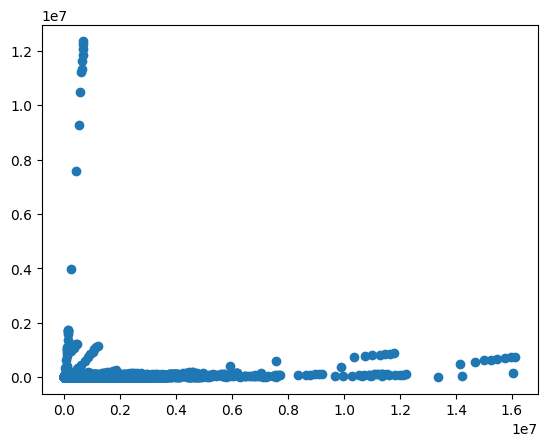

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Project data set/IN_youtube_trending_data.csv")
data = data.dropna(subset=['trending_date', 'publishedAt'])


data['likes'] = pd.to_numeric(data['likes'])
data['dislikes'] = pd.to_numeric(data['dislikes'])


lr = LinearRegression()
#lr.fit(np.array(data['likes']).reshape((-1, 1)), np.array(data['dislikes']).reshape((-1, 1)))


plt.scatter(data['likes'], data['dislikes'])
#plt.plot(data['likes'], lr.predict(np.array(data['likes']).reshape((-1, 1))), color='red', linewidth=2)
plt.show()

LogisticRegression


/tmp/ipython-input-14-746323091.py:9: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Project data set/IN_youtube_trending_data.csv")


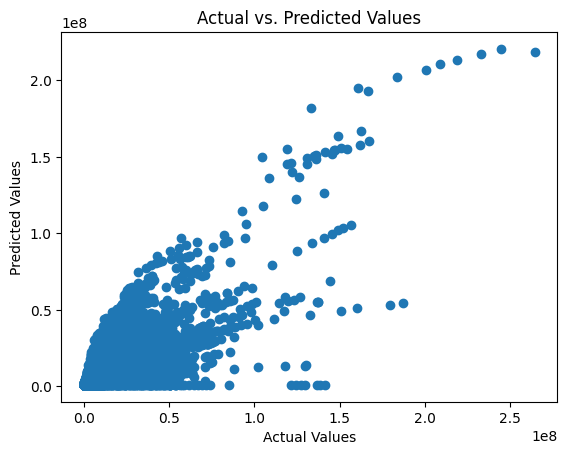

Mean Absolute Error: 1794320.63
Mean Squared Error: 21616055424443.68
R-squared: 0.64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Project data set/IN_youtube_trending_data.csv")

# Define features (X) and target variable (y)
X = data[['likes', 'dislikes']]
y = data['view_count']  # Assuming 'views' is the target variable, change it accordingly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_train_scaled)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Parsing category Id

In [ ]:
id=[]
cat=[]
for t in youtube_cat_in['items']:
    for x,y in t.items():
        if x=='id':
            id.append(y)
            #print(y)#category id
        if x=='snippet':
            for a,b in y.items():
                if a=='title':
                    cat.append(b)
                    #print(b)#category name
                    break
cat_dict={
    'id':id,
    'category':cat
}
category_id=pd.DataFrame(cat_dict)
category_id['id']=category_id['id'].astype('int64')
category_id

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Analysis

1. Which type of videos are trending the most in the last year?

/tmp/ipython-input-17-3306618068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=video_trend_yr['video_count'],y=video_trend_yr['category'],palette='viridis')


<Axes: xlabel='video_count', ylabel='category'>

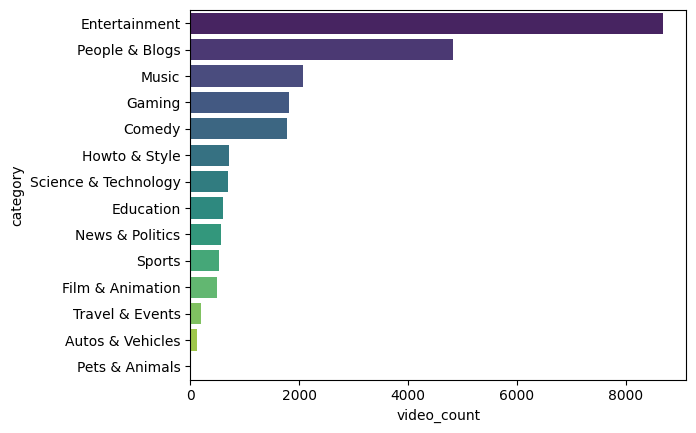

In [ ]:
#per year which type of video are more in trending
trend_yr=youtube_last_yr[['video_id','categoryId','month']]
video_trend_yr=pd.DataFrame(trend_yr.groupby(by='categoryId').video_id.nunique().sort_values(ascending=False)).merge(category_id,how='inner',left_on='categoryId',right_on='id').rename(columns={'video_id':'video_count'})
sns.barplot(x=video_trend_yr['video_count'],y=video_trend_yr['category'],palette='viridis')

2. Which channel has their video trending the most?

/tmp/ipython-input-18-1006015989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_channel['video_count'],y=top5_channel.index,palette='viridis')


<Axes: xlabel='video_count', ylabel='channelTitle'>

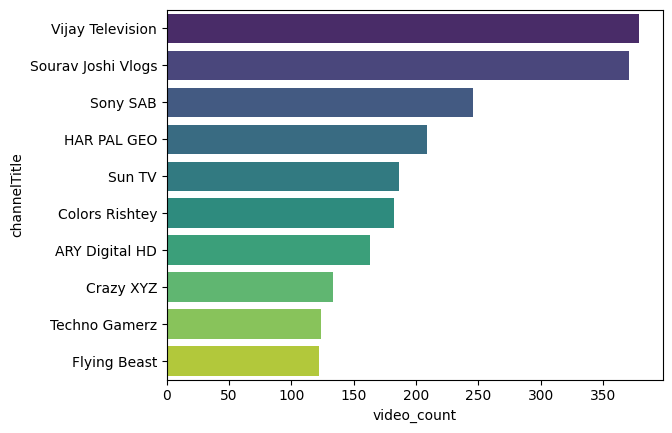

In [ ]:
#how many trending videos published by a channel
top5_channel=pd.DataFrame(youtube_last_yr.groupby(by='channelTitle').video_id.nunique().sort_values(ascending=False)).rename(columns={'video_id':'video_count'}).head(10)
sns.color_palette("hls", 100)
sns.barplot(x=top5_channel['video_count'],y=top5_channel.index,palette='viridis')

3. Top 3 channel whose videos end up on trending page by each month

In [ ]:
#how many trending videos published per week/month by channel
chan_trend_month=pd.DataFrame(youtube_last_yr.groupby(['month','channelTitle']).video_id.nunique().sort_values(ascending=False)).rename(columns={'video_id':'video_count'}).reset_index()
for m in range(1,13):
    print(chan_trend_month.loc[chan_trend_month.month==m].head(3))

    month        channelTitle  video_count
4       1    Vijay Television           51
16      1            Sony SAB           35
19      1  Sourav Joshi Vlogs           34
    month          channelTitle  video_count
18      2             SEVENGERS           34
32      2    Sourav Joshi Vlogs           31
39      2  Pragati Verma Shorts           27
    month        channelTitle  video_count
13      3    Vijay Television           36
15      3           SEVENGERS           35
22      3  Sourav Joshi Vlogs           33
    month        channelTitle  video_count
29      4  Sourav Joshi Vlogs           32
36      4              HUM TV           28
38      4    Vijay Television           28
    month        channelTitle  video_count
24      5  Sourav Joshi Vlogs           33
42      5            Sony SAB           25
55      5    Vijay Television           22
    month        channelTitle  video_count
28      6  Sourav Joshi Vlogs           32
54      6      ARY Digital HD           22
66 

4. Which type of videos take the shortest time to get on trending page after publishing?

/tmp/ipython-input-20-3916010602.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_deltatrend['deltatrend']/np.timedelta64(1, 'D'),y=cat_deltatrend['category'],palette='crest')


<Axes: xlabel='deltatrend', ylabel='category'>

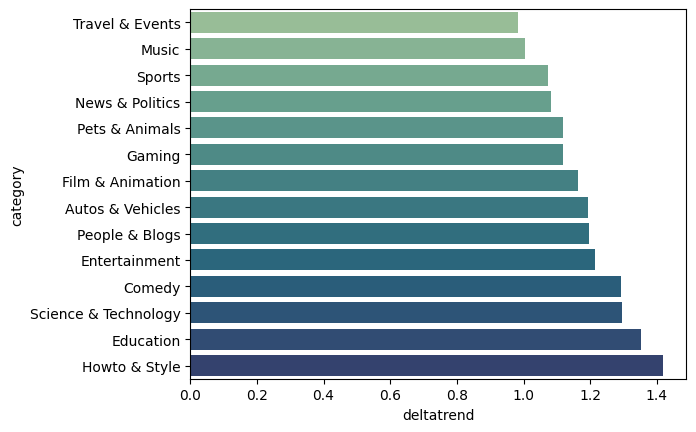

In [ ]:
#how many days after publishing video goes to trending(cat)
df1=youtube_last_yr[['video_id','publishedAt','channelTitle','categoryId']]
df1=df1[~df1.duplicated()]
df2=youtube_last_yr['trending_date']
df1=df1.join(df2)
df1=df1.join([df1['trending_date'].dt.date-df1['publishedAt'].dt.date])

df1=df1.rename(columns={0:'deltatrend'})
cat_deltatrend=pd.DataFrame(df1.groupby(by='categoryId').deltatrend.mean().sort_values(ascending=True)).merge(category_id,how='left',left_on='categoryId',right_on='id').dropna()
sns.barplot(x=cat_deltatrend['deltatrend']/np.timedelta64(1, 'D'),y=cat_deltatrend['category'],palette='crest')

5. Which channel's videos take the shortest time to get on trending page after publishing

In [ ]:
#how many days after publishing video goes to trending(channel)
df1.groupby(by='channelTitle').deltatrend.mean().sort_values(ascending=True).head(10)

,deltatrend
channelTitle,
Film Faktory,0 days
Mrs. Abi Time,0 days
Good News Today,0 days
bhura_turkish_755,0 days
My Smart Guide,0 days
Koilamma Vlogs,0 days
The Gebonions,0 days
AHAD GAMER,0 days
Mahaa News,0 days


6. Which type of video remained longest on trending page?

/tmp/ipython-input-22-3330377511.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df11=youtube_last_yr.groupby(['video_id','channelTitle','categoryId']).apply(lambda x:max(x.trending_date)-min(x.trending_date))
/tmp/ipython-input-22-3330377511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_remain_trend['trending_days']/np.timedelta64(1, 'D'),y=cat_remain_trend['category'],palette='viridis')


<Axes: xlabel='trending_days', ylabel='category'>

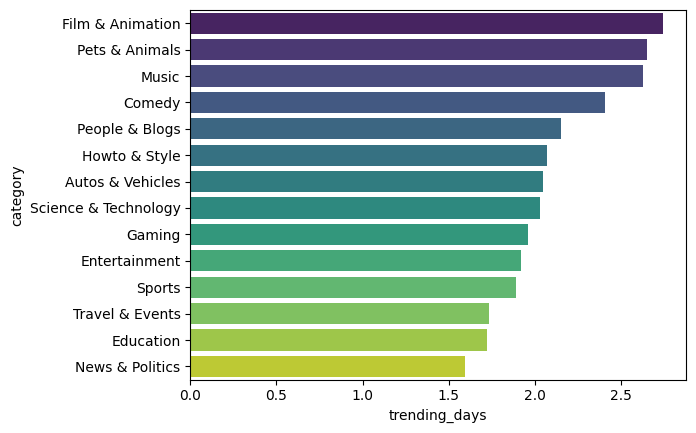

In [ ]:
#which category of video remained longest trending
df11=youtube_last_yr.groupby(['video_id','channelTitle','categoryId']).apply(lambda x:max(x.trending_date)-min(x.trending_date))
df11=pd.DataFrame(df11).rename(columns={0:'trending_days'})
cat_remain_trend=pd.DataFrame(df11.groupby(['categoryId']).trending_days.mean().sort_values(ascending=False)).merge(category_id,how='left',left_on='categoryId',right_on='id')
sns.barplot(x=cat_remain_trend['trending_days']/np.timedelta64(1, 'D'),y=cat_remain_trend['category'],palette='viridis')

7. Which channel's videos remained the longest on trending page?

/tmp/ipython-input-23-1846301136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chan_remain_trend['trending_days']/np.timedelta64(1, 'D'),y=chan_remain_trend.index,palette='viridis')


<Axes: xlabel='trending_days', ylabel='channelTitle'>

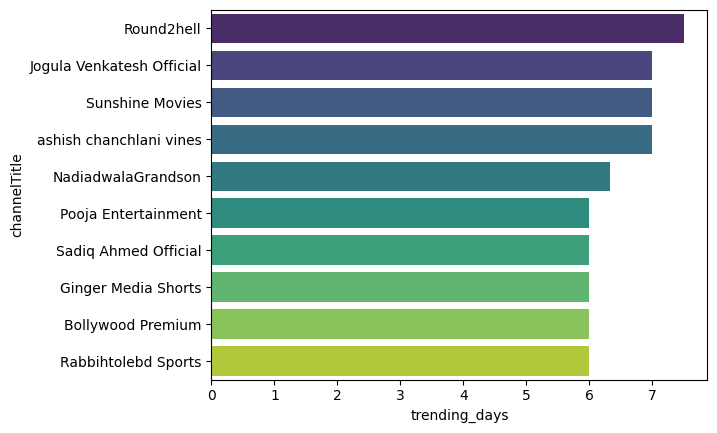

In [ ]:
#which channel has videos remained longest trending
chan_remain_trend=pd.DataFrame(df11.groupby(['channelTitle']).trending_days.mean().sort_values(ascending=False)).head(10)
sns.barplot(x=chan_remain_trend['trending_days']/np.timedelta64(1, 'D'),y=chan_remain_trend.index,palette='viridis')